In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import datetime

In [2]:
dataloc='/var/lib/HPCCSystems/mydropzone/couponcontest/'
trainlistfile='coupon_list_train.csv'
testlistfile='coupon_list_test.csv'

In [3]:
#help(pd.read_csv)

In [18]:
trainlist=pd.read_csv(dataloc+trainlistfile,parse_dates=[6,7,9,10])
testlist=pd.read_csv(dataloc+testlistfile,parse_dates=[6,7,9,10])

In [19]:
trainlist.head()

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,1,0,0,1,1,0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1,1,1,1,1,1,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1,1,1,1,1,1,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d
3,グルメ,グルメ,50,3000,1500,2011-07-09 12:00:00,2011-07-11 12:00:00,2,2011-07-12,2011-12-01,...,1,0,0,1,1,1,関東,千葉県,千葉,3e1ffbedca3569f9e8032d401e8cb4e6
4,グルメ,グルメ,50,2000,1000,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-12-30,...,1,0,0,1,1,0,関東,千葉県,千葉,782934b6c815b4030ea204eef7d4a734


In [20]:
testlist.head()

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,グルメ,グルメ,52,5659,2690,2012-06-26 12:00:00,2012-06-30 12:00:00,4,2012-07-01,2012-10-27,...,1,1,1,1,1,1,関西,大阪府,ミナミ他,c76ea297ebd3a5a4d3bf9f75269f66fa
1,グルメ,グルメ,52,18000,8500,2012-06-27 12:00:00,2012-07-04 12:00:00,7,2012-07-05,2012-10-13,...,1,1,1,0,0,1,関東,東京都,銀座・新橋・東京・上野,dd74dc95ca294afa02db40a543ae1763
2,グルメ,グルメ,51,7200,3480,2012-06-28 12:00:00,2012-07-05 12:00:00,7,2012-07-06,2012-12-28,...,1,1,1,1,1,1,関東,神奈川県,横浜,c65b550cbef918796ad53b1d5b7165c1
3,グルメ,グルメ,50,3300,1650,2012-06-24 12:00:00,2012-06-29 12:00:00,5,2012-06-30,2012-10-31,...,1,2,2,1,1,2,関西,兵庫県,兵庫,f93dc6e223935d817e1237f8f73b56a2
4,グルメ,グルメ,56,3650,1600,2012-06-26 12:00:00,2012-07-03 12:00:00,7,2012-07-04,2012-11-10,...,1,1,1,1,1,1,東海,愛知県,愛知,86c64391318f1d751647bf8e1882cf1d


In [21]:
def getmissingnums(inpdf):
    c=inpdf.columns
    for col in c:
        print col
        print inpdf[col].isnull().sum()

In [22]:
trainlist[trainlist.USABLE_DATE_FRI.isnull()].head(2)

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
327,宅配,宅配,50,3990,1980,2011-07-04 12:00:00,2011-07-05 12:00:00,1,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,東北,宮城県,宮城,f64bb6a708c4dffe8cd837964169fc99
346,宅配,宅配,50,6900,3450,2011-07-04 12:00:00,2011-07-05 12:00:00,1,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,東北,山形県,山形,247de01d749a63d72bf4f18cdf872d6c


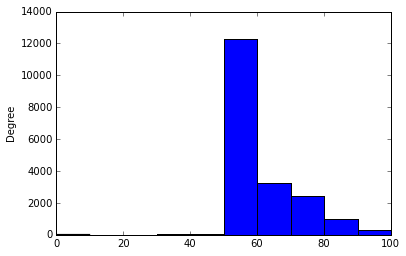

In [23]:
trainlist.PRICE_RATE.plot(kind='hist')

In [24]:
print trainlist.COUPON_ID_hash.count()
print testlist.COUPON_ID_hash.count()

19413
310


In [25]:
getmissingnums(trainlist)

CAPSULE_TEXT
0
GENRE_NAME
0
PRICE_RATE
0
CATALOG_PRICE
0
DISCOUNT_PRICE
0
DISPFROM
0
DISPEND
0
DISPPERIOD
0
VALIDFROM
6147
VALIDEND
6147
VALIDPERIOD
0
USABLE_DATE_MON
7005
USABLE_DATE_TUE
7005
USABLE_DATE_WED
7005
USABLE_DATE_THU
7005
USABLE_DATE_FRI
7005
USABLE_DATE_SAT
7005
USABLE_DATE_SUN
7005
USABLE_DATE_HOLIDAY
7005
USABLE_DATE_BEFORE_HOLIDAY
7005
large_area_name
0
ken_name
0
small_area_name
0
COUPON_ID_hash
0


In [26]:
getmissingnums(testlist)

CAPSULE_TEXT
0
GENRE_NAME
0
PRICE_RATE
0
CATALOG_PRICE
0
DISCOUNT_PRICE
0
DISPFROM
0
DISPEND
0
DISPPERIOD
0
VALIDFROM
96
VALIDEND
96
VALIDPERIOD
0
USABLE_DATE_MON
101
USABLE_DATE_TUE
101
USABLE_DATE_WED
101
USABLE_DATE_THU
101
USABLE_DATE_FRI
101
USABLE_DATE_SAT
101
USABLE_DATE_SUN
101
USABLE_DATE_HOLIDAY
101
USABLE_DATE_BEFORE_HOLIDAY
101
large_area_name
0
ken_name
0
small_area_name
0
COUPON_ID_hash
0


In [27]:
trainlist.dtypes

CAPSULE_TEXT                          object
GENRE_NAME                            object
PRICE_RATE                             int64
CATALOG_PRICE                          int64
DISCOUNT_PRICE                         int64
DISPFROM                              object
DISPEND                       datetime64[ns]
DISPPERIOD                            object
VALIDFROM                             object
VALIDEND                      datetime64[ns]
VALIDPERIOD                           object
USABLE_DATE_MON                      float64
USABLE_DATE_TUE                      float64
USABLE_DATE_WED                      float64
USABLE_DATE_THU                      float64
USABLE_DATE_FRI                      float64
USABLE_DATE_SAT                      float64
USABLE_DATE_SUN                      float64
USABLE_DATE_HOLIDAY                  float64
USABLE_DATE_BEFORE_HOLIDAY           float64
large_area_name                       object
ken_name                              object
small_area

In [15]:
trainlist.head(2)

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,dispstyear
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,0,0,1,1,0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af,2011
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1,1,1,1,1,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd,2011


In [ ]:
trainlist

In [31]:
def getYear(inpStr):
    return datetime.datetime.strptime(inpStr,'%Y-%m-%d %H:%M:%S').strftime('%Y')
def getYear2(inpStr):
    try:
        return datetime.datetime.strptime(str(inpStr),'%Y-%m-%d').strftime('%Y')
    except:
        return datetime.datetime.strptime('1900-01-01','%Y-%m-%d').strftime('%Y')

trainlist['dispstyear']=trainlist.DISPFROM.apply(getYear)
trainlist['dispendyear']=trainlist.DISPEND.apply(lambda x: x.year)
trainlist['valstyear']=trainlist.VALIDFROM.apply(getYear2)
trainlist['valendyear']=trainlist.VALIDEND.apply(getYear2)

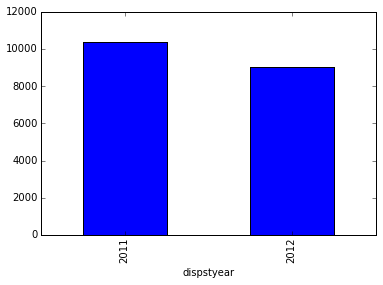

In [35]:
trainlist.groupby('dispstyear').dispstyear.count().plot(kind='bar')

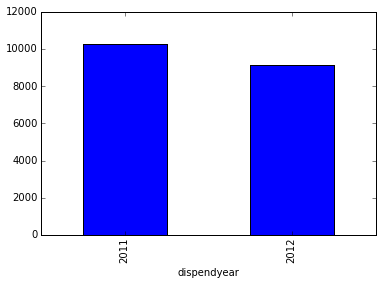

In [36]:
trainlist.groupby('dispendyear').dispendyear.count().plot(kind='bar')

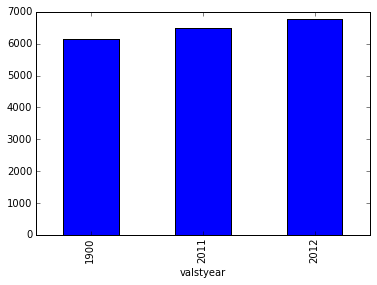

In [37]:
trainlist.groupby('valstyear').valstyear.count().plot(kind='bar')

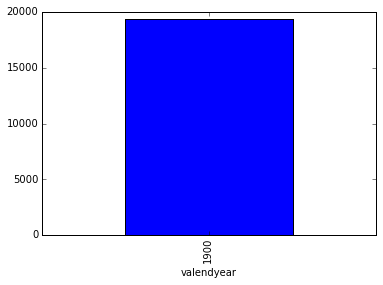

In [38]:
trainlist.groupby('valendyear').valendyear.count().plot(kind='bar')

In [78]:
datetime.datetime.strptime('2015-04-01 00:00:05','%Y-%m-%d %H:%M:%S')

datetime.datetime(2015, 4, 1, 0, 0, 5)

In [37]:
datetime.datetime.now()

datetime.datetime(2015, 9, 4, 6, 30, 6, 198322)

In [63]:
def getMonths(inpStr):
    inpdate=datetime.datetime.strptime(inpStr,'%Y-%m-%d %H:%M:%S')
    nowdate=datetime.datetime.now()
    delta=nowdate-inpdate
    return int(delta.days*1.0/90)
usersample['months']=usersample.REG_DATE.apply(getMonths)

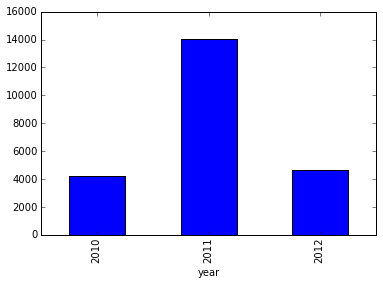

In [64]:
usersample.groupby('year').year.count().plot(kind='bar')

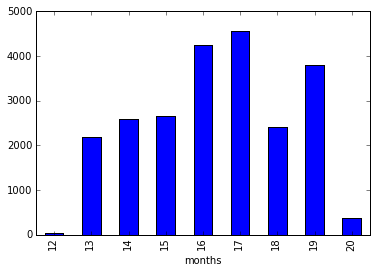

In [65]:
usersample.groupby('months').year.count().plot(kind='bar')

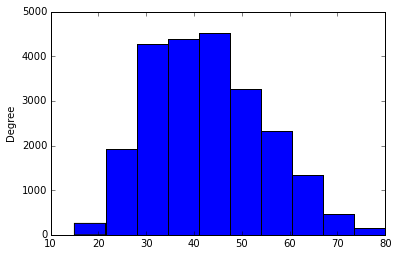

In [13]:
usersample.AGE.plot(kind='hist')
usersample.groupby('PREF_NAME').PREF_NAME.count().plot(kind='bar')

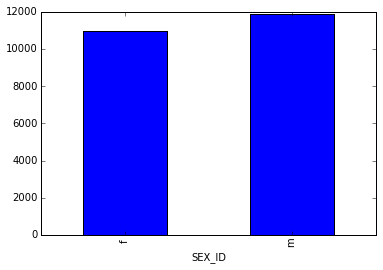

In [15]:
usersample.groupby('SEX_ID').SEX_ID.count().plot(kind='bar')